In [18]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
import collections
from scipy.spatial import distance
import math

(5000,)

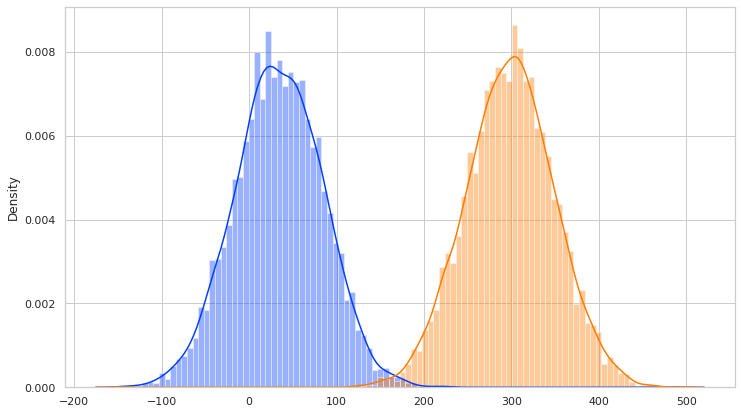

In [29]:
value1 = np.random.normal(loc=35,scale=50,size=5000)
#value2 =  np.random.normal(loc=300,scale=20,size=10000)
q1 = value1
value1 = np.random.normal(loc=300,scale=50,size=5000)
#value2 =  np.random.normal(loc=35,scale=20,size=10000)
q2 = value1
q = np.concatenate([q1,q2])
q1[-1] = q.max()
q2[-1] = q.min()
fig = plt.subplots(1,1,figsize = (12,7))
sns.distplot(q1,bins=100)
sns.distplot(q2,bins=100)
#sns.distplot(q)
q1.shape

C1 [134 668 194   3   0   0   0   0   0   1]
E1: [-26.97718341  12.39873243  51.77464827  91.15056411 130.52647995
 169.90239578 209.27831162 248.65422746 288.0301433  327.40605914
 366.78197498]
C2: [  1   0   0   0   0   0   1 246 668  84]
E2: [-26.97718341  12.39873243  51.77464827  91.15056411 130.52647995
 169.90239578 209.27831162 248.65422746 288.0301433  327.40605914
 366.78197498]
INTERSECT: [[1 0 0 0 0 0 0 0 0 1]]
UNION: [[134 668 194   3   0   0   1 246 668  84]]
JACC: [[0.00746269 0.         0.         0.                nan        nan
  0.         0.         0.         0.01190476]]
JMEAN: 0.0024209310589907605


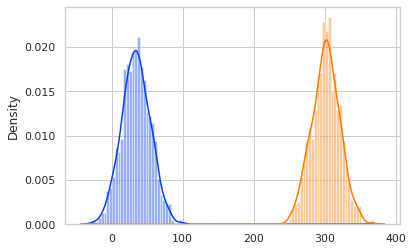

C1 [ 44 493 431  31   0   0   0   0   0   1]
E1: [-13.75087484  22.00012912  57.75113308  93.50213704 129.253141
 165.00414497 200.75514893 236.50615289 272.25715685 308.00816081
 343.75916478]
C2: [  1   0   0   0   0   0  17 336 574  72]
E2: [-13.75087484  22.00012912  57.75113308  93.50213704 129.253141
 165.00414497 200.75514893 236.50615289 272.25715685 308.00816081
 343.75916478]
INTERSECT: [[1 0 0 0 0 0 0 0 0 1]]
UNION: [[ 44 493 431  31   0   0  17 336 574  72]]
JACC: [[0.02272727 0.         0.         0.                nan        nan
  0.         0.         0.         0.01388889]]
JMEAN: 0.004577020202020202


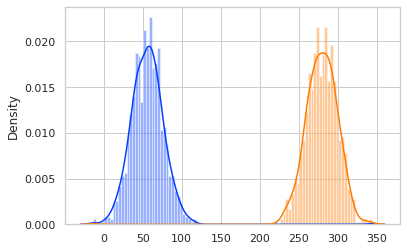

C1 [ 41 438 452  68   0   0   0   0   0   1]
E1: [  7.94611972  40.94883215  73.95154459 106.95425702 139.95696946
 172.95968189 205.96239433 238.96510676 271.9678192  304.97053163
 337.97324407]
C2: [  1   0   0   0   0   3 134 592 254  16]
E2: [  7.94611972  40.94883215  73.95154459 106.95425702 139.95696946
 172.95968189 205.96239433 238.96510676 271.9678192  304.97053163
 337.97324407]
INTERSECT: [[1 0 0 0 0 0 0 0 0 1]]
UNION: [[ 41 438 452  68   0   3 134 592 254  16]]
JACC: [[0.02439024 0.         0.         0.                nan 0.
  0.         0.         0.         0.0625    ]]
JMEAN: 0.009654471544715446


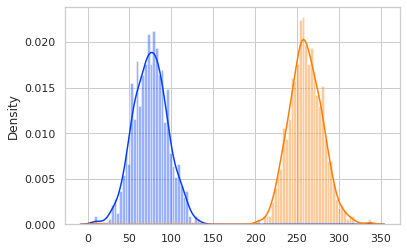

C1 [ 28 262 481 211  17   0   0   0   0   1]
E1: [ 29.33026899  55.95791112  82.58555326 109.21319539 135.84083752
 162.46847965 189.09612179 215.72376392 242.35140605 268.97904819
 295.60669032]
C2: [  1   0   0   0   0   4 105 428 393  69]
E2: [ 29.33026899  55.95791112  82.58555326 109.21319539 135.84083752
 162.46847965 189.09612179 215.72376392 242.35140605 268.97904819
 295.60669032]
INTERSECT: [[1 0 0 0 0 0 0 0 0 1]]
UNION: [[ 28 262 481 211  17   4 105 428 393  69]]
JACC: [[0.03571429 0.         0.         0.         0.         0.
  0.         0.         0.         0.01449275]]
JMEAN: 0.005020703933747412


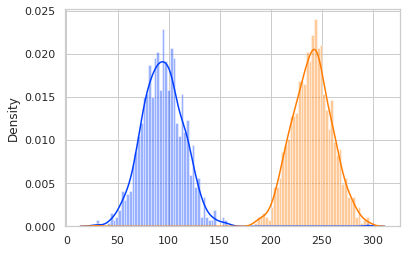

C1 [ 27 199 451 260  61   1   0   0   0   1]
E1: [ 53.64277556  77.09296838 100.5431612  123.99335402 147.44354683
 170.89373965 194.34393247 217.79412529 241.24431811 264.69451093
 288.14470375]
C2: [  1   0   0   0  11 100 337 409 129  13]
E2: [ 53.64277556  77.09296838 100.5431612  123.99335402 147.44354683
 170.89373965 194.34393247 217.79412529 241.24431811 264.69451093
 288.14470375]
INTERSECT: [[ 1  0  0  0 11  1  0  0  0  1]]
UNION: [[ 27 199 451 260  61 100 337 409 129  13]]
JACC: [[0.03703704 0.         0.         0.         0.18032787 0.01
  0.         0.         0.         0.07692308]]
JMEAN: 0.030428798281257295


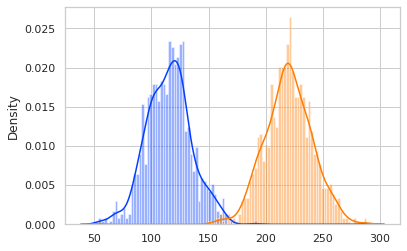

C1 [ 14  68 278 332 230  71   5   1   0   1]
E1: [ 69.90259926  88.48930839 107.07601752 125.66272666 144.24943579
 162.83614492 181.42285405 200.00956318 218.59627231 237.18298144
 255.76969057]
C2: [  1   0   0   4  28 125 344 318 146  34]
E2: [ 69.90259926  88.48930839 107.07601752 125.66272666 144.24943579
 162.83614492 181.42285405 200.00956318 218.59627231 237.18298144
 255.76969057]
INTERSECT: [[ 1  0  0  4 28 71  5  1  0  1]]
UNION: [[ 14  68 278 332 230 125 344 318 146  34]]
JACC: [[0.07142857 0.         0.         0.01204819 0.12173913 0.568
  0.01453488 0.00314465 0.         0.02941176]]
JMEAN: 0.08203071971493012


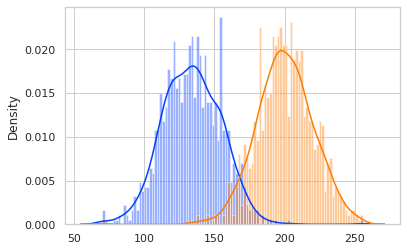

C1 [  8  36 141 285 278 175  51  23   2   1]
E1: [ 91.66633179 106.89207187 122.11781196 137.34355204 152.56929212
 167.7950322  183.02077229 198.24651237 213.47225245 228.69799253
 243.92373261]
C2: [  1   3  16  64 177 303 270 121  36   9]
E2: [ 91.66633179 106.89207187 122.11781196 137.34355204 152.56929212
 167.7950322  183.02077229 198.24651237 213.47225245 228.69799253
 243.92373261]
INTERSECT: [[  1   3  16  64 177 175  51  23   2   1]]
UNION: [[  8  36 141 285 278 303 270 121  36   9]]
JACC: [[0.125      0.08333333 0.11347518 0.2245614  0.63669065 0.57755776
  0.18888889 0.19008264 0.05555556 0.11111111]]
JMEAN: 0.2306256517588316


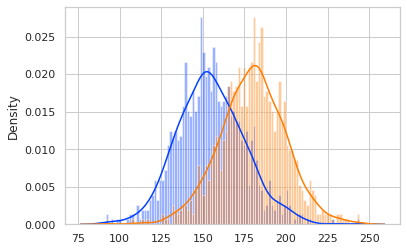

C1 [  1   0   1  33 114 276 309 196  56  14]
E1: [ 69.45080358  86.47098683 103.49117008 120.51135333 137.53153658
 154.55171982 171.57190307 188.59208632 205.61226957 222.63245282
 239.65263607]
C2: [  2   0  22 108 247 314 222  69  15   1]
E2: [ 69.45080358  86.47098683 103.49117008 120.51135333 137.53153658
 154.55171982 171.57190307 188.59208632 205.61226957 222.63245282
 239.65263607]
INTERSECT: [[  1   0   1  33 114 276 222  69  15   1]]
UNION: [[  2   0  22 108 247 314 309 196  56  14]]
JACC: [[0.5               nan 0.04545455 0.30555556 0.46153846 0.87898089
  0.7184466  0.35204082 0.26785714 0.07142857]]
JMEAN: 0.4001447318691445


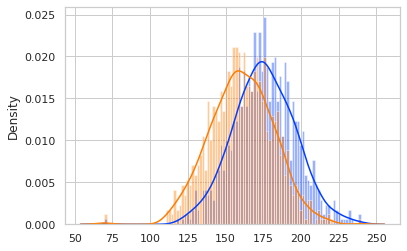

C1 [  1   0   2  13  73 268 353 211  71   8]
E1: [ 73.24301911  92.27999046 111.31696181 130.35393316 149.3909045
 168.42787585 187.4648472  206.50181855 225.5387899  244.57576124
 263.61273259]
C2: [ 11  47 232 385 229  86   9   0   0   1]
E2: [ 73.24301911  92.27999046 111.31696181 130.35393316 149.3909045
 168.42787585 187.4648472  206.50181855 225.5387899  244.57576124
 263.61273259]
INTERSECT: [[ 1  0  2 13 73 86  9  0  0  1]]
UNION: [[ 11  47 232 385 229 268 353 211  71   8]]
JACC: [[0.09090909 0.         0.00862069 0.03376623 0.31877729 0.32089552
  0.02549575 0.         0.         0.125     ]]
JMEAN: 0.09234645800031913


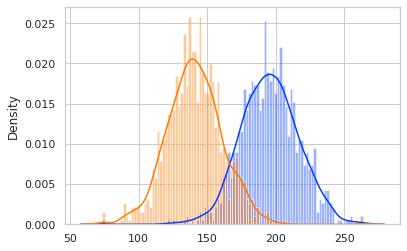

C1 [  1   0   0   2  19 188 456 281  49   4]
E1: [ 57.43722666  81.21898832 105.00074998 128.78251165 152.56427331
 176.34603497 200.12779664 223.9095583  247.69131996 271.47308163
 295.25484329]
C2: [ 29 201 452 269  45   3   0   0   0   1]
E2: [ 57.43722666  81.21898832 105.00074998 128.78251165 152.56427331
 176.34603497 200.12779664 223.9095583  247.69131996 271.47308163
 295.25484329]
INTERSECT: [[ 1  0  0  2 19  3  0  0  0  1]]
UNION: [[ 29 201 452 269  45 188 456 281  49   4]]
JACC: [[0.03448276 0.         0.         0.00743494 0.42222222 0.01595745
  0.         0.         0.         0.25      ]]
JMEAN: 0.07300973718893407


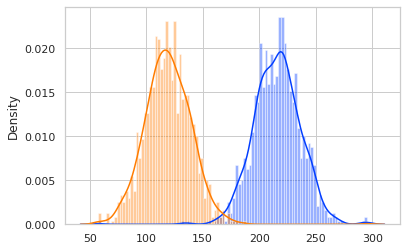

C1 [  1   0   0   0   1  34 256 478 209  21]
E1: [ 46.63261073  71.99086133  97.34911193 122.70736253 148.06561313
 173.42386373 198.78211433 224.14036493 249.49861552 274.85686612
 300.21511672]
C2: [ 89 376 403 114  16   1   0   0   0   1]
E2: [ 46.63261073  71.99086133  97.34911193 122.70736253 148.06561313
 173.42386373 198.78211433 224.14036493 249.49861552 274.85686612
 300.21511672]
INTERSECT: [[1 0 0 0 1 1 0 0 0 1]]
UNION: [[ 89 376 403 114  16  34 256 478 209  21]]
JACC: [[0.01123596 0.         0.         0.         0.0625     0.02941176
  0.         0.         0.         0.04761905]]
JMEAN: 0.015076676738110976


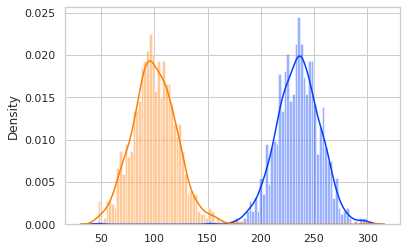

C1 [  1   0   0   0   0   1  80 496 383  39]
E1: [  9.57606754  40.84494271  72.11381789 103.38269306 134.65156823
 165.9204434  197.18931857 228.45819375 259.72706892 290.99594409
 322.26481926]
C2: [ 27 309 523 136   4   0   0   0   0   1]
E2: [  9.57606754  40.84494271  72.11381789 103.38269306 134.65156823
 165.9204434  197.18931857 228.45819375 259.72706892 290.99594409
 322.26481926]
INTERSECT: [[1 0 0 0 0 0 0 0 0 1]]
UNION: [[ 27 309 523 136   4   1  80 496 383  39]]
JACC: [[0.03703704 0.         0.         0.         0.         0.
  0.         0.         0.         0.02564103]]
JMEAN: 0.006267806267806267


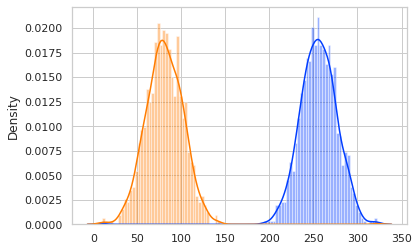

C1 [  1   0   0   0   0   0  32 377 518  72]
E1: [ -4.65146925  29.87309339  64.39765602  98.92221866 133.4467813
 167.97134393 202.49590657 237.02046921 271.54503185 306.06959448
 340.59415712]
C2: [ 63 527 389  20   0   0   0   0   0   1]
E2: [ -4.65146925  29.87309339  64.39765602  98.92221866 133.4467813
 167.97134393 202.49590657 237.02046921 271.54503185 306.06959448
 340.59415712]
INTERSECT: [[1 0 0 0 0 0 0 0 0 1]]
UNION: [[ 63 527 389  20   0   0  32 377 518  72]]
JACC: [[0.01587302 0.         0.         0.                nan        nan
  0.         0.         0.         0.01388889]]
JMEAN: 0.003720238095238095


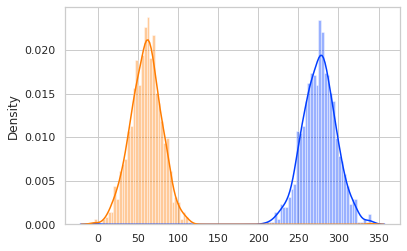

C1 [  1   0   0   0   0   0   5 229 623 142]
E1: [-20.85185107  16.68760095  54.22705298  91.766505   129.30595702
 166.84540905 204.38486107 241.9243131  279.46376512 317.00321714
 354.54266917]
C2: [128 633 234   4   0   0   0   0   0   1]
E2: [-20.85185107  16.68760095  54.22705298  91.766505   129.30595702
 166.84540905 204.38486107 241.9243131  279.46376512 317.00321714
 354.54266917]
INTERSECT: [[1 0 0 0 0 0 0 0 0 1]]
UNION: [[128 633 234   4   0   0   5 229 623 142]]
JACC: [[0.0078125  0.         0.         0.                nan        nan
  0.         0.         0.         0.00704225]]
JMEAN: 0.0018568441901408452


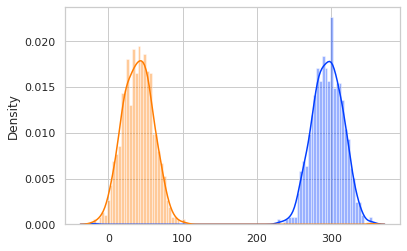

In [19]:
l = 300
coll = []
ljaccn =[]
for f in range(35,300,20):
    value =  np.random.normal(loc=f,scale=20,size=1000)
    q1=value
    value =  np.random.normal(loc=l,scale=20,size=1000)
    q2=value
    q = np.concatenate([q1,q2])
    q1[-1] = q.max()
    q1[0] = q.min()
    q2[-1] = q.min()
    q2[0] = q.max()
    sns.distplot(q1,bins=100)
    sns.distplot(q2,bins=100)
    count1, bin_edges1 = np.histogram(q1, bins=math.floor(1+3.3*np.log10(q1.shape[0])))
    print('C1',count1)
    print('E1:',bin_edges1)
    count2, bin_edges2 = np.histogram(q2,bins=math.floor(1+3.3*np.log10(q2.shape[0])))
    print('C2:',count2)
    print('E2:',bin_edges2)
    intersect =[]
    for i in range(count1.shape[0]):
        intersect.append(min(count1[i],count2[i]))
    intersect = np.array([intersect])
    print('INTERSECT:',intersect)
    union = []
    for i in range(count1.shape[0]):
        union.append(max(count1[i],count2[i]))
    union = np.array([union])
    isum = intersect.sum()
    usum = union.sum()
    jaccn = isum / usum 
    print('UNION:',union)
    jacc = intersect / union
    print('JACC:',jacc)
    jacc = jacc[~np.isnan(jacc)]
    print('JMEAN:',jacc.mean())
    ljaccn.append(jaccn) 
    coll.append(jacc.mean())
    #sns.distplot(q)
    plt.show()
    l = l-20

In [20]:
intersect

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [21]:
union

array([[128, 633, 234,   4,   0,   0,   5, 229, 623, 142]])

In [22]:
jacc

array([0.0078125 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00704225])

In [23]:
coll

[0.0024209310589907605,
 0.004577020202020202,
 0.009654471544715446,
 0.005020703933747412,
 0.030428798281257295,
 0.08203071971493012,
 0.2306256517588316,
 0.4001447318691445,
 0.09234645800031913,
 0.07300973718893407,
 0.015076676738110976,
 0.006267806267806267,
 0.003720238095238095,
 0.0018568441901408452]

In [24]:
qw = np.linspace(0,13,14)
qw

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13.])

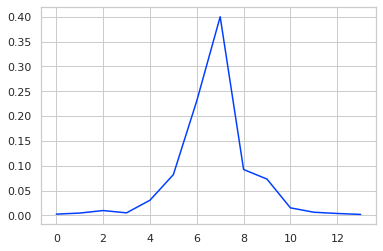

In [27]:
plt.plot(qw,coll)

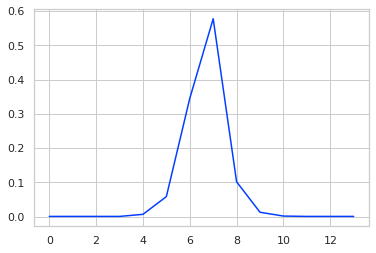

In [28]:
plt.plot(qw,ljaccn)